In [9]:
from acquire import wrangle_zillow
from prepare import remove_outliers

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [10]:
df = wrangle_zillow()

In [12]:
df = df[df['bed'] < 20]

In [14]:
df = df[df['bath'] < 12]
df = df[df['sqft'] < 16000]

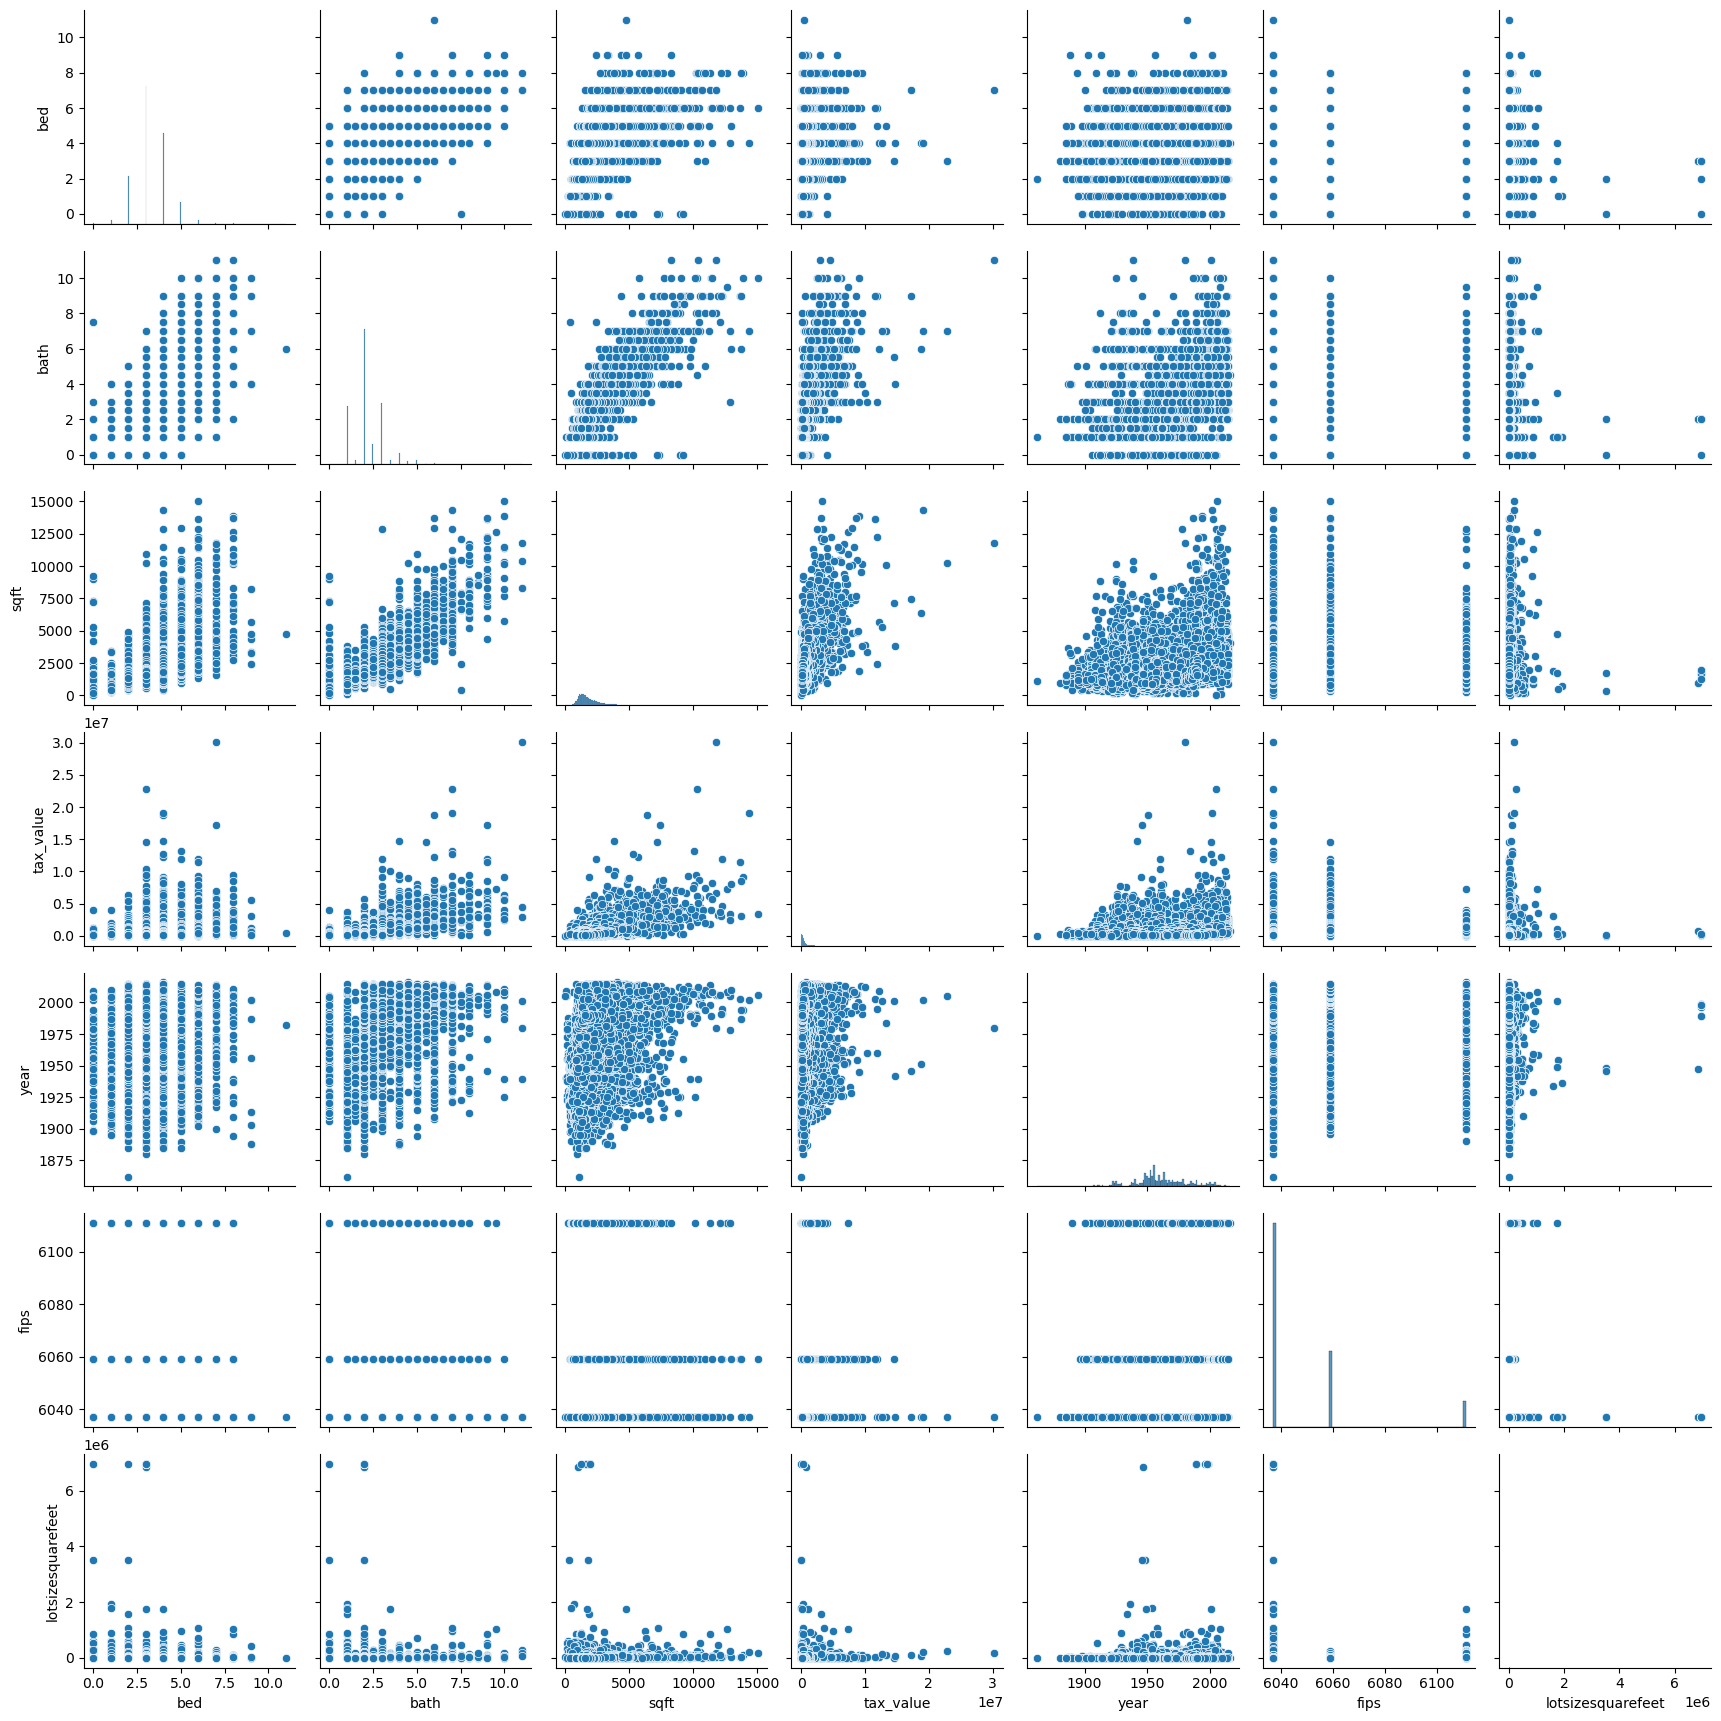

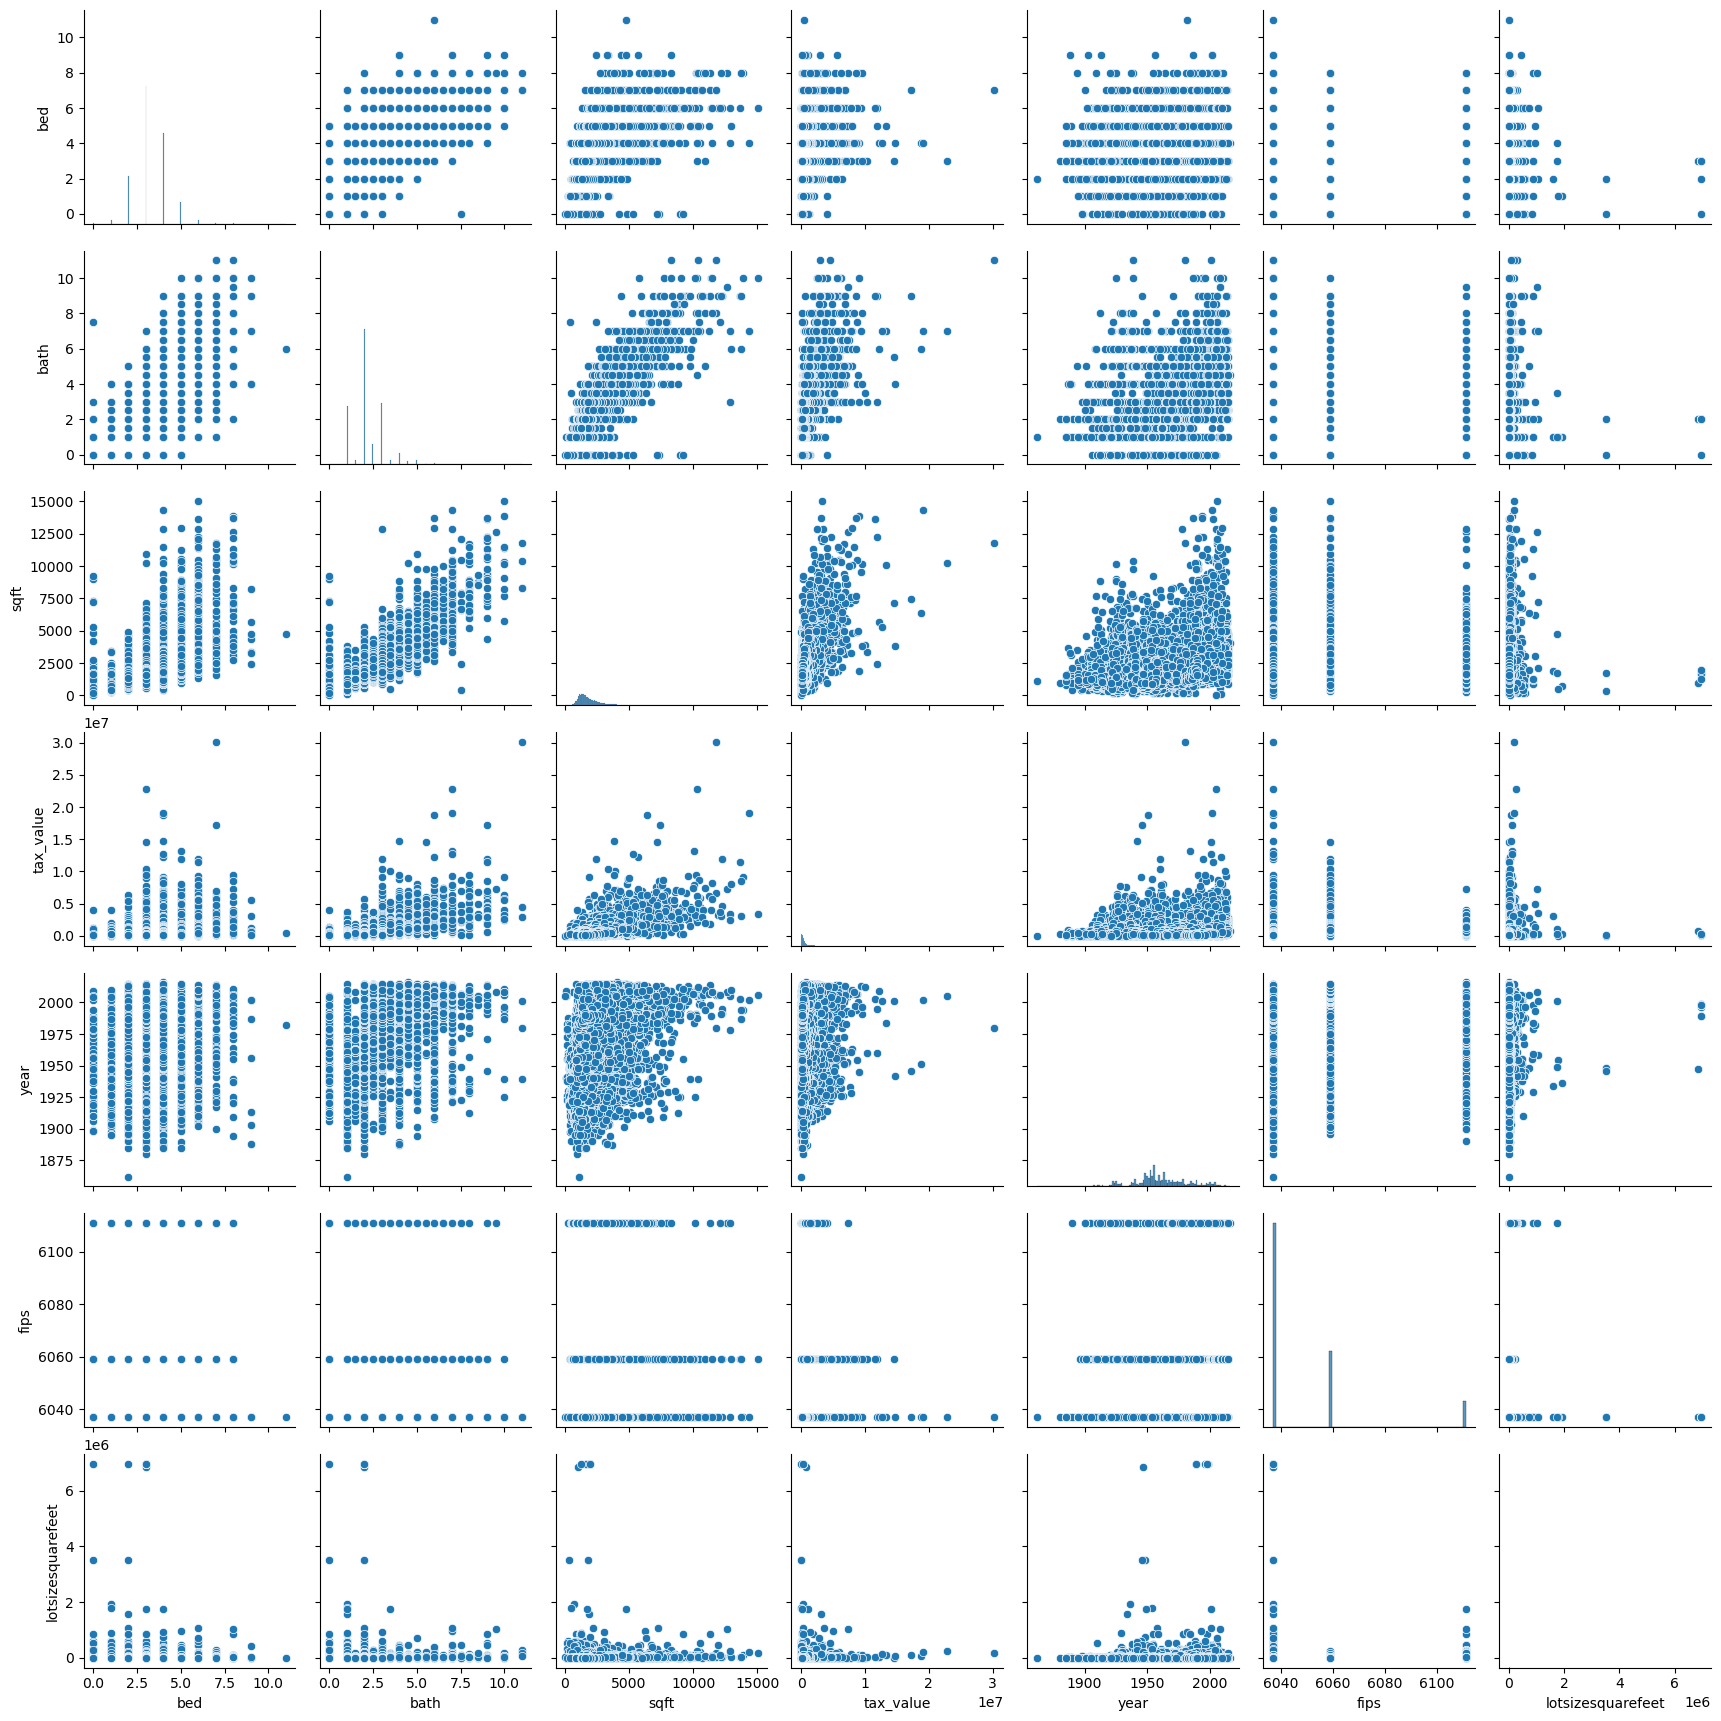

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
df.head()

,bed,bath,sqft,tax_value,year,fips,lotsizesquarefeet
4,4.0,2.0,3633.0,296425.0,2005.0,6037.0,9826.0
7,3.0,2.0,2077.0,646760.0,1926.0,6037.0,6490.0
11,0.0,0.0,1200.0,5328.0,1972.0,6037.0,4054.0
14,0.0,0.0,171.0,6920.0,1973.0,6037.0,13002.0
15,0.0,0.0,203.0,14166.0,1960.0,6037.0,17359.0
